# Single Linkage Clustering Algorithm

Luiz Felipe Raveduti Zafiro - RA: 120513 -
Artificial Intelligence - Federal University of São Paulo (Unifesp) - 20

## Imports

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

## Datasets

In [124]:
# Loading data sets

df_aggregation = pd.read_csv('./Datasets/aggregation.txt', sep='\t', header=None)
df_flame = pd.read_csv('./Datasets/flame.txt', sep='\t', header=None)
df_d31 = pd.read_csv('./Datasets/d31.txt', sep='\t', header=None)
df_pathbased = pd.read_csv('./Datasets/pathbased.txt', sep='\t', header=None)

# All data sets have the same form and the same dataframe structure
df_aggregation.head()

,0,1,2
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2


In [125]:
# Scaling values to 0-1 range

scl = MinMaxScaler()

# Aggregation
scl.fit(df_aggregation[[0]])
df_aggregation[0] = scl.transform(df_aggregation[[0]])
scl.fit(df_aggregation[[1]])
df_aggregation[1] = scl.transform(df_aggregation[[1]])

# Flame
scl.fit(df_flame[[0]])
df_flame[0] = scl.transform(df_flame[[0]])
scl.fit(df_flame[[1]])
df_flame[1] = scl.transform(df_flame[[1]])

# D31
scl.fit(df_d31[[0]])
df_d31[0] = scl.transform(df_d31[[0]])
scl.fit(df_d31[[1]])
df_d31[1] = scl.transform(df_d31[[1]])

# Pathbased
scl.fit(df_pathbased[[0]])
df_pathbased[0] = scl.transform(df_pathbased[[0]])
scl.fit(df_pathbased[[1]])
df_pathbased[1] = scl.transform(df_pathbased[[1]])

df_aggregation.head()

,0,1,2
0,0.367470,0.981618,2
1,0.347892,0.941176,2
2,0.334337,0.970588,2
3,0.325301,0.987132,2
4,0.313253,0.959559,2


<Figure size 432x288 with 0 Axes>

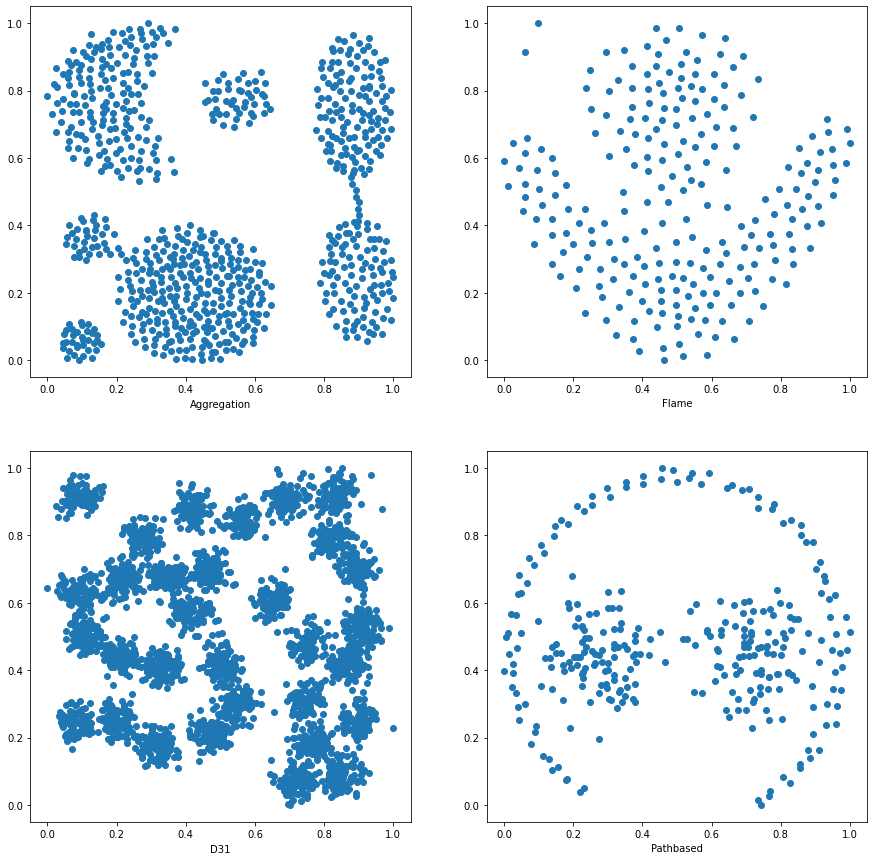

In [126]:
# Data sets visualization

f = plt.figure()
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axes[0][0].scatter(df_aggregation[0], df_aggregation[1])
axes[0][0].set_xlabel('Aggregation', labelpad = 5)

axes[0][1].scatter(df_flame[0], df_flame[1])
axes[0][1].set_xlabel('Flame')

axes[1][0].scatter(df_d31[0], df_d31[1])
axes[1][0].set_xlabel('D31', labelpad = 5)

axes[1][1].scatter(df_pathbased[0], df_pathbased[1])
axes[1][1].set_xlabel('Pathbased')

plt.show()

## Dendograms and Hierarchical Clustering using Scipy

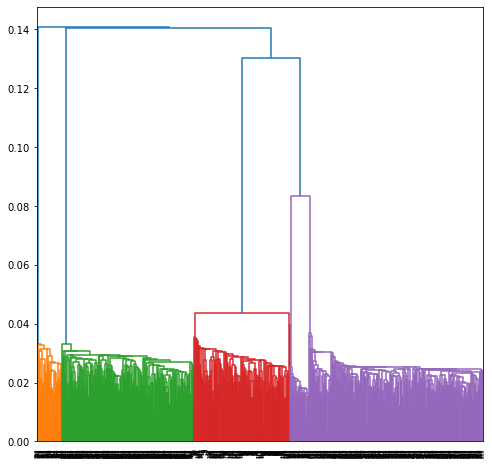

In [127]:
# For each dataset

# Aggregation
link = linkage(df_aggregation[[0,1]], 'single')
plt.figure(figsize=(8,8))
dendrogram(link,
            orientation='top',
            labels=range(0,len(df_aggregation.index)),
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

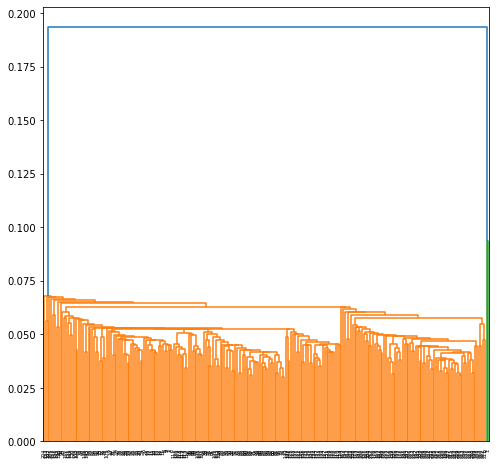

In [128]:
# Flame
link = linkage(df_flame[[0,1]], 'single')
plt.figure(figsize=(8,8))
dendrogram(link,
            orientation='top',
            labels=range(0,len(df_flame.index)),
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

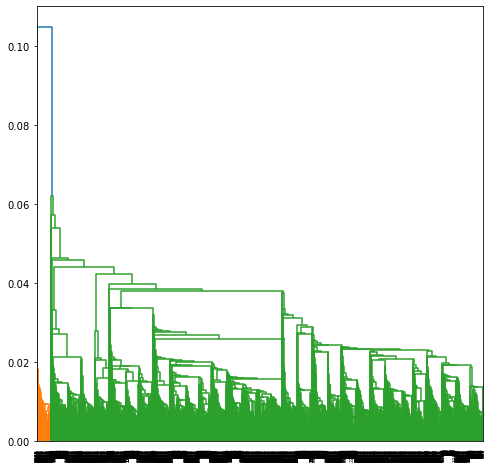

In [129]:
# D31
link = linkage(df_d31[[0,1]], 'single')
plt.figure(figsize=(8,8))
dendrogram(link,
            orientation='top',
            labels=range(0,len(df_d31.index)),
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

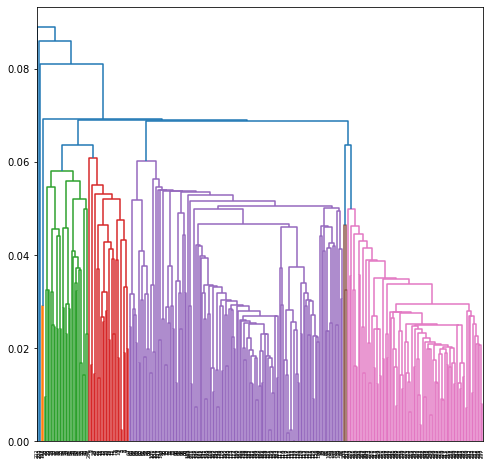

In [130]:
# Pathbased
link = linkage(df_pathbased[[0,1]], 'single')
plt.figure(figsize=(8,8))
dendrogram(link,
            orientation='top',
            labels=range(0,len(df_pathbased.index)),
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

## Single Linkage using skLearn
Using the same values of clusters as k from KMeans problem

### Using Single Linkage

In [131]:
# Aggregation
model = AgglomerativeClustering(n_clusters= 7,affinity='euclidean', linkage='single')
agg_predict = model.fit_predict(df_aggregation[[0,1]])
df_aggregation['pred'] = agg_predict

# Flame
model = AgglomerativeClustering(n_clusters= 4,affinity='euclidean', linkage='single')
fl_predict = model.fit_predict(df_flame[[0,1]])
df_flame['pred'] = fl_predict

# D31
model = AgglomerativeClustering(n_clusters= 31,affinity='euclidean', linkage='single')
d31_predict = model.fit_predict(df_d31[[0,1]])
df_d31['pred'] = d31_predict

# Pathbased
model = AgglomerativeClustering(n_clusters= 3,affinity='euclidean', linkage='single')
path_predict = model.fit_predict(df_pathbased[[0,1]])
df_pathbased['pred'] = path_predict

# Number of preddicted classes
pred_a = df_aggregation['pred'].nunique()
pred_f = df_flame['pred'].nunique()
pred_d = df_d31['pred'].nunique()
pred_p = df_pathbased['pred'].nunique()

print(pred_a, pred_f, pred_d, pred_p)

7 4 31 3


<Figure size 432x288 with 0 Axes>

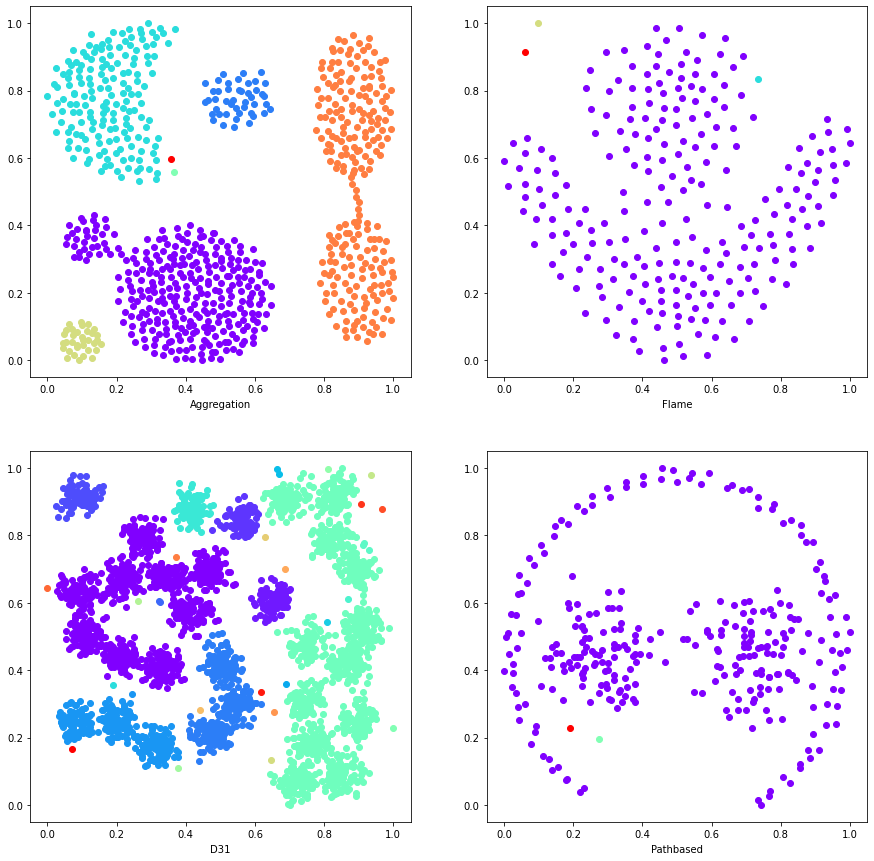

In [132]:
# Results visualization

from matplotlib.pyplot import cm

f = plt.figure()
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

# Aggregation
colors = iter(cm.rainbow(np.linspace(0,1,pred_a)))
for i in range(pred_a):
    df_a = df_aggregation[df_aggregation['pred']==i]
    axes[0][0].scatter(df_a[0], df_a[1], color=next(colors))
axes[0][0].set_xlabel('Aggregation', labelpad = 5)

# Flame
colors = iter(cm.rainbow(np.linspace(0,1,pred_f)))
for i in range(pred_f):
    df_a = df_flame[df_flame['pred']==i]
    axes[0][1].scatter(df_a[0], df_a[1], color=next(colors))
axes[0][1].set_xlabel('Flame', labelpad = 5)

# D31
colors = iter(cm.rainbow(np.linspace(0,1,pred_d)))
for i in range(pred_d):
    df_a = df_d31[df_d31['pred']==i]
    axes[1][0].scatter(df_a[0], df_a[1], color=next(colors))
axes[1][0].set_xlabel('D31', labelpad = 5)

# Pathbased
colors = iter(cm.rainbow(np.linspace(0,1,pred_p)))
for i in range(pred_p):
    df_a = df_pathbased[df_pathbased['pred']==i]
    axes[1][1].scatter(df_a[0], df_a[1], color=next(colors))
axes[1][1].set_xlabel('Pathbased', labelpad = 5)

plt.show()

### Using Ward Linkage

In [133]:
# Aggregation
model = AgglomerativeClustering(n_clusters= 7,affinity='euclidean', linkage='ward')
agg_predict = model.fit_predict(df_aggregation[[0,1]])
df_aggregation['pred'] = agg_predict

# Flame
model = AgglomerativeClustering(n_clusters= 4,affinity='euclidean', linkage='ward')
fl_predict = model.fit_predict(df_flame[[0,1]])
df_flame['pred'] = fl_predict

# D31
model = AgglomerativeClustering(n_clusters= 31,affinity='euclidean', linkage='ward')
d31_predict = model.fit_predict(df_d31[[0,1]])
df_d31['pred'] = d31_predict

# Pathbased
model = AgglomerativeClustering(n_clusters= 3,affinity='euclidean', linkage='ward')
path_predict = model.fit_predict(df_pathbased[[0,1]])
df_pathbased['pred'] = path_predict

# Number of preddicted classes
pred_a = df_aggregation['pred'].nunique()
pred_f = df_flame['pred'].nunique()
pred_d = df_d31['pred'].nunique()
pred_p = df_pathbased['pred'].nunique()

print(pred_a, pred_f, pred_d, pred_p)

7 4 31 3


<Figure size 432x288 with 0 Axes>

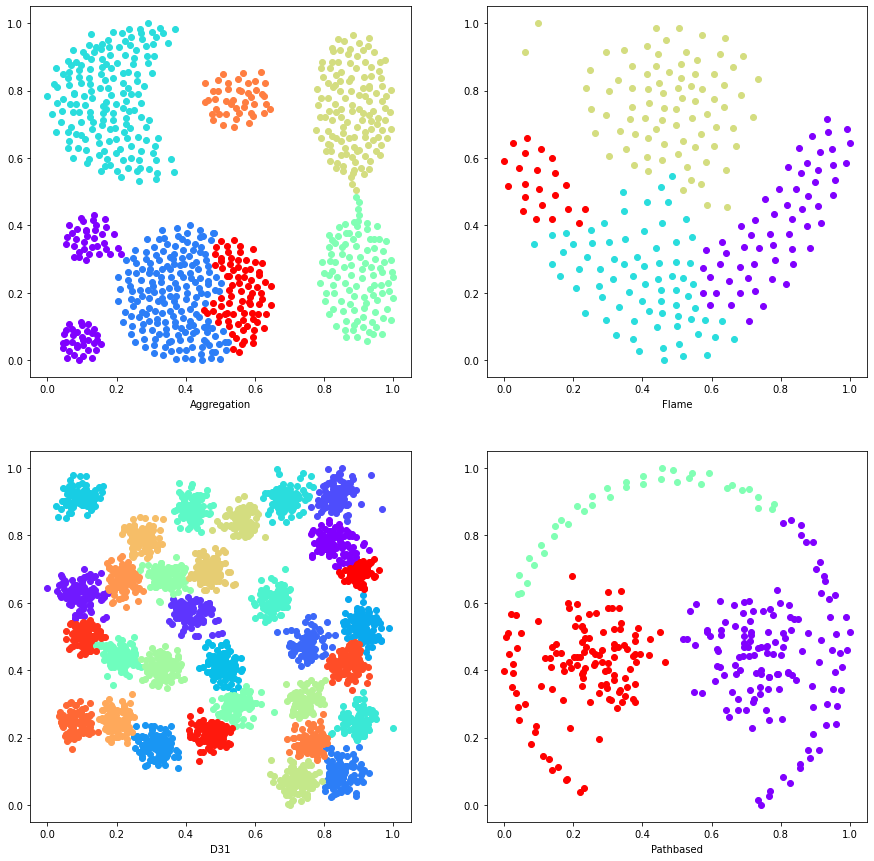

In [134]:
# Results visualization

from matplotlib.pyplot import cm

f = plt.figure()
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

# Aggregation
colors = iter(cm.rainbow(np.linspace(0,1,pred_a)))
for i in range(pred_a):
    df_a = df_aggregation[df_aggregation['pred']==i]
    axes[0][0].scatter(df_a[0], df_a[1], color=next(colors))
axes[0][0].set_xlabel('Aggregation', labelpad = 5)

# Flame
colors = iter(cm.rainbow(np.linspace(0,1,pred_f)))
for i in range(pred_f):
    df_a = df_flame[df_flame['pred']==i]
    axes[0][1].scatter(df_a[0], df_a[1], color=next(colors))
axes[0][1].set_xlabel('Flame', labelpad = 5)

# D31
colors = iter(cm.rainbow(np.linspace(0,1,pred_d)))
for i in range(pred_d):
    df_a = df_d31[df_d31['pred']==i]
    axes[1][0].scatter(df_a[0], df_a[1], color=next(colors))
axes[1][0].set_xlabel('D31', labelpad = 5)

# Pathbased
colors = iter(cm.rainbow(np.linspace(0,1,pred_p)))
for i in range(pred_p):
    df_a = df_pathbased[df_pathbased['pred']==i]
    axes[1][1].scatter(df_a[0], df_a[1], color=next(colors))
axes[1][1].set_xlabel('Pathbased', labelpad = 5)

plt.show()